## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando Python
 
### Principal Component Analysis  (PCA)
### Dimensionality Reduction

### Exemplo de aplicação da técnica de PCA

#### Objetivo: Criar uma segmentação de países utilizando os recordes femininos da modalidade esportiva de corridas. Para o desenvolvimento do modelo será utilizada uma base disponível no site da universidade de Wisconsin através do endereço: http://www.stat.wisc.edu/~rich/JWMULT06dat/T1-9.dat.

#### Nesta base temos os recordes femininos internacionais, referência 2005, das seguintes modalidades: 100 metros em segundos, 200 metros em segundos, 400 metros em segundos, 800 metros em minutos, 1.500 metros em minutos, 3.000 metros em minutos e maratona em minutos.

#### Dicionário de variáveis

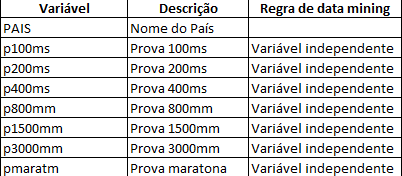

In [ ]:
# Importar as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

In [ ]:
# Importar os dados
dados = pd.read_csv("Base_Paises.csv", sep=";")

In [ ]:
dados.head()

In [ ]:
dados.info()

In [ ]:
dados.describe().T

In [ ]:
print(dados)

In [ ]:
dados.isna().sum()

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dados.boxplot(column='p100ms')
fig.set_title('')
fig.set_ylabel('p100ms')


plt.subplot(4, 2, 2)
fig = dados.boxplot(column='p200ms')
fig.set_title('')
fig.set_ylabel('p200ms')


plt.subplot(4, 2, 3)
fig = dados.boxplot(column='p400ms')
fig.set_title('')
fig.set_ylabel('p400ms')

plt.subplot(4, 2, 4)
fig = dados.boxplot(column='p800mm')
fig.set_title('')
fig.set_ylabel('p800mm')

plt.subplot(4, 2, 5)
fig = dados.boxplot(column='p1500mm')
fig.set_title('')
fig.set_ylabel('p1500mm')

plt.subplot(4, 2, 6)
fig = dados.boxplot(column='p3000mm')
fig.set_title('')
fig.set_ylabel('p3000mm')


plt.subplot(4, 2, 7)
fig = dados.boxplot(column='pmaratm')
fig.set_title('')
fig.set_ylabel('pmaratm')


In [ ]:
# Excluindo outliers e selecionando somente as variáveis segmentadoras

#aux = dados[dados['pmaratm'] < 180] 
# dados_semout = aux.drop(['PAIS'], axis=1)

dados_semout = dados.drop(['PAIS'], axis=1)

dados_semout.describe()



In [ ]:
# Análise exploratória dos dados
#sb.pairplot()
sb.pairplot(dados_semout)

In [ ]:
# Matriz de Correlação de Pearson
dados_semout.corr(method='pearson')

In [ ]:
# Matriz de correlação
sb.heatmap(dados_semout.corr(), cmap='coolwarm', annot = True);

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dados_semout)

In [ ]:
scaled_df = scaler.transform(dados_semout)

In [ ]:
print(scaled_df)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Pedindo a quantidade de componentes possíveis p variáveis pode ser gerado até p componnetes
pca = PCA(n_components=7)

In [ ]:
pca.fit(scaled_df)

In [ ]:
print('Auto-valores:')
print(pca.explained_variance_)
print()

# a soma dos auto-valores é igual a quantidade de variáveis

In [ ]:
# Quanto da variância é explicada por cada componente.
print('Variância Explicada:')
print(pca.explained_variance_ratio_)
print()


In [ ]:
print('Auto-vetores:')
print(pca.components_)
print()


In [ ]:
from pandas import DataFrame

loadings = DataFrame(pca.components_.T)
loadings.index = ['PC %s' % pc for pc in loadings.index + 1]
loadings.columns = ['TS %s' % pc for pc in loadings.columns + 1]
loadings

In [ ]:
# Gráfico Scree Plot

perc = pca.explained_variance_ratio_ * 100

perc = DataFrame(perc, columns=['Percentage explained ratio'], index=['PC %s' % pc for pc in np.arange(len(perc)) + 1])
ax = perc.plot(kind='bar')

In [ ]:
# base padronizada

scaled_df.shape

In [ ]:
scaled_df.round(2)

In [ ]:
# Pontuando a base com o PCA

x_pca = pca.transform(scaled_df)

In [ ]:
# base pontuada com PCA

x_pca.shape

In [ ]:
# base componentes principais
x_pca.round(2)

# Extraindo e plotando dois componentes

In [ ]:
from sklearn.decomposition import PCA

line = dict(linewidth=1, linestyle='--', color='k')
marker = dict(linestyle='none', marker='o', markersize=7, color='red', alpha=0.5)


pca = PCA(n_components=2, copy=True)
X_2 = pca.fit_transform(scaled_df)

fig, ax = plt.subplots()
ax.plot(X_2[:, 0], X_2[:, 1], **marker) 
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.axhline(**line)
ax.axvline(**line)
_ = ax.set_title("PCA")

# Selecionando somente 1 componente 

In [ ]:
pca_1 = PCA(n_components=1)
 

In [ ]:
pca_1.fit(scaled_df)

In [ ]:
x_pca_1 = pca_1.transform(scaled_df)

In [ ]:
# Check the dimensions of data after PCA
x_pca_1.shape

In [ ]:
x_pca_1.round(2)

In [ ]:
# Check the values of eigen vectors
# prodeced by principal components

pca_1.components_

In [ ]:
PCA_1 = x_pca_1[:,0]

In [ ]:
PCA_1

In [ ]:
PCA_1.round(2)

In [ ]:
Basefim = DataFrame(PCA_1) 

In [ ]:
Basefim.columns = ['PCA_1']

In [ ]:
Basefim['PAIS'] =  DataFrame(dados['PAIS'] )

In [ ]:
Basefim['PAIS'] = dados['PAIS'] 

In [ ]:
Basefim 

In [ ]:
Basefim.describe().round()

In [ ]:
#transformando o componenete: Quanto mais rápido maior o indicador
Basefim['PCA_1'] = -Basefim['PCA_1']

In [ ]:
Basefim.describe().round()

In [ ]:
#transformando o indicadoor de Performance:normalização de 0 a 1 e multiplicado por 100

Basefim['IndPerf'] = (Basefim['PCA_1'] - min(Basefim['PCA_1']))/( max(Basefim['PCA_1']) - min(Basefim['PCA_1']) ) *100

In [ ]:
Basefim.describe().round(2)

In [ ]:
Basefim 